In [253]:
from population_copy import *
import pickle
import matplotlib.pyplot as plt

In [37]:
def get_common_grid():
    pop_tif_nodata = -100.0
    cls_population = Population(stitch_images=False, pop_tif_nodata=pop_tif_nodata)
    union_geom = cls_population.get_combined_geometry()
    
    pop_tif = rasterio.open("../data/population/count/1995/population_count.tif")
    
    pop_out_image_cropped, pop_out_image_cropped_transform = cls_population.filter_out_tif(pop_tif, cls_population.get_bounding_geom_tif(union_geom), pop_tif_nodata, crop=True)
    return pop_tif, pop_out_image_cropped.shape, pop_out_image_cropped_transform

def convert_grid_coords_to_geo_coords(tif, data_shape, data_transform):
    tif_data = tif.read()
    height, width = data_shape
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(tif.transform, rows, cols)
    lons= np.array(xs)
    lats = np.array(ys)
    
    np.save("../data/lons.npy", lons)
    np.save("../data/lats.npy", lats)

In [39]:
a, b, c = get_common_grid()
convert_grid_coords_to_geo_coords(a, b, c)

In [2]:
lons, lats = np.load("../data/lons.npy"), np.load("../data/lats.npy")

In [3]:
lons.shape

(2012, 1563)

In [49]:
with open("../data/voronoi_tessellation_meta_10.0_1.pkl", "rb") as f:
    data = pickle.load(f)

In [54]:
a = list(data["site_to_point_dict"][0])

In [110]:
from shapely import geometry, Polygon,  Point, difference
# from shapely.geometry import MultiPoint

In [251]:
cmap = plt.cm.get_cmap("Pastel1", len(data["site_to_point_dict"]))

lines  = []
all_colors = []

for _, coords in data["site_to_point_dict"].items():
    a_polygon = Polygon(coords)
#     centroid = a_polygon.centroid.coords[:][0]
#     min_radius = 10**4
    min_x, min_y, max_x, max_y = a_polygon.bounds
    bounding_box = [(min_x, min_y), (max_x, min_y), (max_x, max_y), (min_x, max_y), (min_x, min_y)]
    lines.append(np.array(bounding_box))
    all_colors.append(cmap(_))
            
    

# for pt in bounding_box:
#     radius = np.sqrt((pt[0]-centroid[0])**2 + (pt[1]-centroid[1])**2)
#     min_radius = min(min_radius, radius)
    
# circle = a_polygon.centroid.buffer(min_radius)


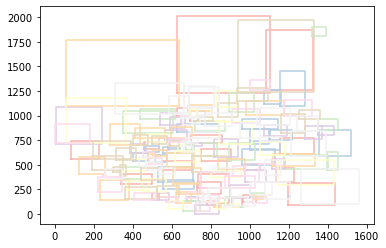

In [252]:
# circle.exterior
for i, line in enumerate(lines):
    plt.plot(line[:, 1], line[:, 0], c=all_colors[i])

In [235]:
bound_box = Polygon([(min_x, min_y), (max_x, min_y), (max_x, max_y), (min_x, max_y)])

In [236]:
gpd_df= gpd.GeoDataFrame(index=[0, 1, 2], crs='epsg:4326', geometry=[a_polygon.boundary, circle.exterior, bound_box.exterior])


<AxesSubplot:>

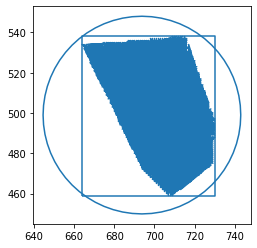

In [237]:
gpd_df.plot(aspect=1)

In [175]:
# gpd_df.exterior.plot(aspect=1)

In [182]:
gpd_df.iloc[0]

geometry    LINESTRING (664.00000 459.00000, 730.00000 459...
Name: 0, dtype: geometry

In [189]:
s1 = gpd.geoseries.GeoSeries([bound_box.boundary])
s2 = gpd.geoseries.GeoSeries([a_polygon.boundary])

In [194]:
diff = s2.difference(s1)

<AxesSubplot:>

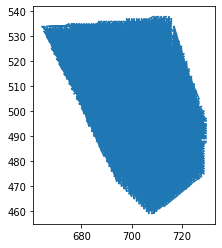

In [198]:
diff.plot(aspect=1)

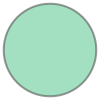

In [203]:
Point((0,0)).buffer(10.0)

In [254]:
# def hanging_line(point1, point2):
#     import numpy as np

#     a = (point2[1] - point1[1])/(np.cosh(point2[0]) - np.cosh(point1[0]))
#     b = point1[1] - a*np.cosh(point1[0])
#     x = np.linspace(point1[0], point2[0], 100)
#     y = a*np.cosh(x) + b

#     return (x,y)

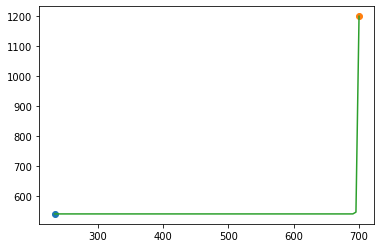

In [256]:
point1 = [234,540]
point2 = [700,1200]

x,y = hanging_line(point1, point2)

plt.plot(point1[0], point1[1], 'o')
plt.plot(point2[0], point2[1], 'o')
plt.plot(x,y)